In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from specutils import Spectrum1D
import glob
from matplotlib.colors import Normalize, LinearSegmentedColormap


In [2]:
#Load a fits spectra file from sdss with with loop
filename='spec-1678-53433-0001(2).fits'
with fits.open(filename) as f:
    specdata=f[1].data
    header_data=f[0].header

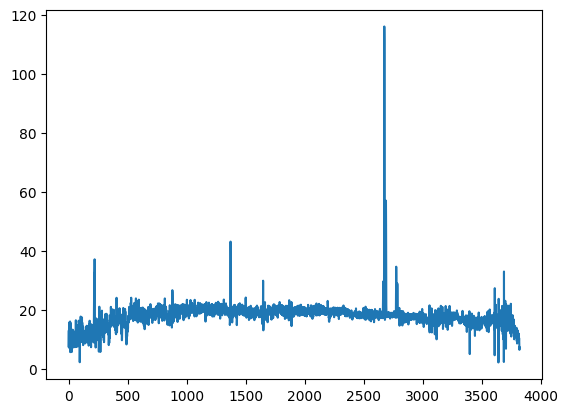

In [17]:
plt.plot(specdata['flux'])

In [12]:
skydata=specdata['sky'].reshape(-1,1)


In [13]:
#normalise the data and transform it for skleanr suitability
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_sky_data= scaler.fit_transform(skydata)


In [15]:
#PCA begins from here
from sklearn.decomposition import PCA
#Define number of components here
pca= PCA(n_components=1)
#performing fitting and transformation on the data
principal_comp=pca.fit_transform(normalised_sky_data) 
reconstructed_data= pca.inverse_transform(principal_comp)

reconstructed_sky_data=scaler.inverse_transform(reconstructed_data)
subtraction= skydata - reconstructed_sky_data

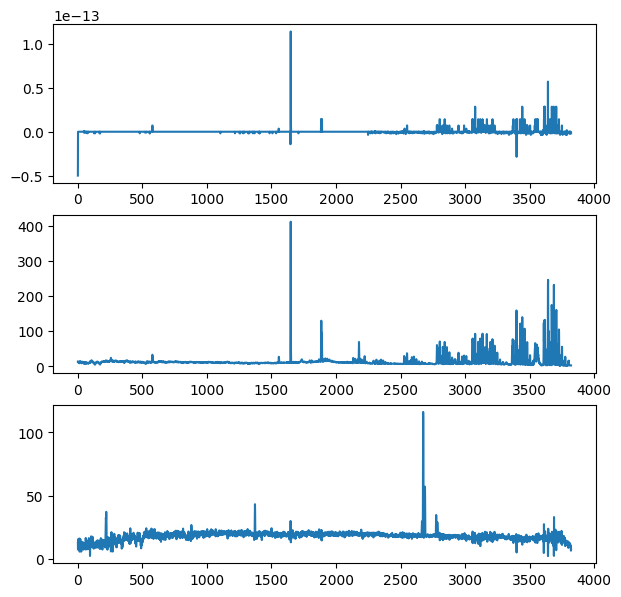

In [27]:
fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(7,7))
ax[0].plot(subtraction)
ax[1].plot(skydata)
ax[2].plot(specdata['flux'])